In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tflearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [2]:
# Read data
dataset = pd.read_csv("Data/data.csv")

# Length of data
len(dataset)

92000

In [3]:
# Plot dataset examples
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

# Number of pixels
number_of_pixels = X.shape[1]
num_classes = 46 # Number of classes
img_width = 32 
img_height = 32
img_depth = 1

X_images = X.values.reshape(X.shape[0], img_width, img_height) #gives a new shape to array without chaging the values of the data

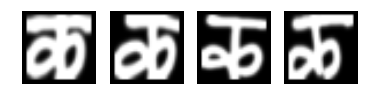

In [4]:
# Show the first 4 images
for i in range(1, 5):    
    plt.subplot(240+i)
    plt.axis('off')
    plt.imshow(X_images[i-1], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
# Remove bad data
remove = np.where(dataset.iloc[:,1024].values==1024)
dataset = dataset.drop(dataset.index[remove[0]])
X = dataset.iloc[:,:-1]
X_images = X.values.reshape(X.shape[0], img_width, img_height)
Y = dataset.iloc[:,-1]

In [6]:
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
Y = binencoder.fit_transform(Y)

In [8]:
#import keras for the deep learning libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [9]:
seed = 123 
X_train, X_test, y_train, y_test = train_test_split(X_images, Y, test_size=0.20, random_state=seed)

X_train = X_train/255
X_test = X_test/255

X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_depth).astype('float32')
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_depth).astype('float32')

In [12]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (4, 4), input_shape=(img_height, img_width, img_depth), 
                     activation='relu', name="conv_1"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_1"))
    model.add(Conv2D(64, (3, 3), activation='relu', name="conv_2"))
    model.add(MaxPooling2D(pool_size=(2, 2), name="pool_2"))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', name="dense_1"))
    model.add(Dense(50, activation='relu', name="dense_2"))
    model.add(Dense(num_classes, activation='softmax', name="modeloutput"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [14]:
model = cnn_model()
history = model.fit(X_train, y_train, validation_split=0.15, epochs=10, batch_size = 150, verbose=2)

Train on 62560 samples, validate on 11040 samples
Epoch 1/10
 - 100s - loss: 1.3464 - acc: 0.6381 - val_loss: 0.6578 - val_acc: 0.8133
Epoch 2/10
 - 95s - loss: 0.5443 - acc: 0.8422 - val_loss: 0.4922 - val_acc: 0.8571
Epoch 3/10
 - 118s - loss: 0.4035 - acc: 0.8802 - val_loss: 0.3986 - val_acc: 0.8871
Epoch 4/10
 - 102s - loss: 0.3310 - acc: 0.9016 - val_loss: 0.3540 - val_acc: 0.8968
Epoch 5/10
 - 116s - loss: 0.2757 - acc: 0.9160 - val_loss: 0.3420 - val_acc: 0.9010
Epoch 6/10
 - 136s - loss: 0.2397 - acc: 0.9274 - val_loss: 0.3336 - val_acc: 0.9029
Epoch 7/10
 - 133s - loss: 0.2136 - acc: 0.9345 - val_loss: 0.3308 - val_acc: 0.9087
Epoch 8/10
 - 123s - loss: 0.1865 - acc: 0.9414 - val_loss: 0.3149 - val_acc: 0.9114
Epoch 9/10
 - 115s - loss: 0.1683 - acc: 0.9479 - val_loss: 0.3303 - val_acc: 0.9077
Epoch 10/10
 - 98s - loss: 0.1477 - acc: 0.9536 - val_loss: 0.3176 - val_acc: 0.9140


In [16]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy is: %.2f%%" % (scores[1]*100))

Accuracy is: 91.97%


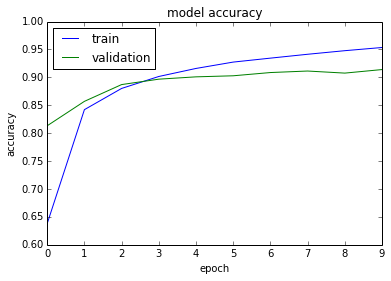

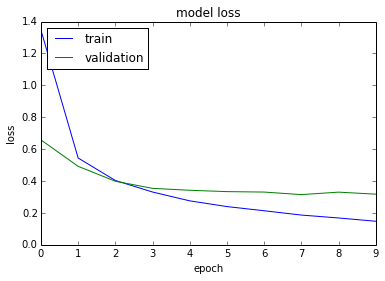

In [17]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'validation'], loc='upper left')
plt.show()